In [1]:
!pip install pymorphy2[fast]

  Using cached DAWG-0.8.0-cp38-cp38-linux_x86_64.whl


## Очистка текста

In [2]:
from typing import List
import nltk
import string
import pymorphy2
import codecs

class PrepareNew():
  def __init__(self):
    self.morph = pymorphy2.MorphAnalyzer()
    self.tokenizer = nltk.WordPunctTokenizer()
    self.stopwords = set(line.strip() for line in codecs.open('rus_stopwords.txt', "r", "utf_8_sig").readlines())

  def prepare_corp(self, news_list: List[str]):
    return [self.newstext2token(news_text) for news_text in news_list]

  def newstext2token(self, news_text: str):
      tokens = self.tokenizer.tokenize(news_text.lower())
      tokens_with_no_punct = [self.morph.parse(w)[0].normal_form for w in tokens if all(c not in string.punctuation for c in w)]
      tokens_base_forms = [w for w in tokens_with_no_punct if w not in self.stopwords and w.isalpha()]
      tokens_last = [w for w in tokens_base_forms if len(w)>1]
      return tokens_last


## Построение облака

In [4]:
from wordcloud import WordCloud
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

words = PrepareNew().newstext2token(codecs.open('ved.txt', "r", "utf_8_sig").read())

In [7]:
text = ' '.join(words)

In [8]:
# Generate a word cloud image
wc = WordCloud(background_color="white", max_words=200, colormap="gist_heat", mask=mask).generate(text)

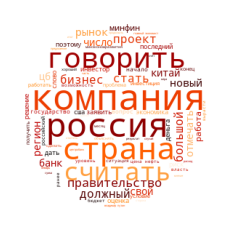

In [9]:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wc)
plt.axis("off")
plt.savefig("ved_test.png")

## В виде функции

In [ ]:
from wordcloud import WordCloud
import numpy as np

def makecloud(news_text: str)
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)

    words = PrepareNew().newstext2token(text)
    text = ''.join(words)

    # Generate a word cloud image
    wc = WordCloud(background_color="white", max_words=200, colormap="gist_heat", mask=mask).generate(text)

    # the matplotlib way:
    import matplotlib.pyplot as plt

    plt.imshow(wc)
    plt.axis("off")
    plt.show()
